## Home Credit
***

- 40517, Daniel André
- 40772, Valentine Heimann
- 40804, Berkay Günes
- 41967, Justus Merzenich

***
### Introduction
***
Home Credit is an international Non-Banking Financial Institution (NBFI) that focuses on lending primarily to people who are considered "unbanked" - in other words, people who have no access to banks or similar financial services. Founded in the Czech Republic in 1997, it today operates in several countries spanning from the United States to China. 


### From Business Problem to Machine Learning
#### Is Machine Learning the answer? 

The short answer is yes. The dataset provided was part of a Kaggle Machine Learning competition, and most banks and financial institutions have been the prime beneficiaries of Machine Learning, both present (graph below) and historically. 

![McKinsey](https://puu.sh/FpD5l/e3389e17ae.png)

The above graph by the <i>McKinsey Global Institute</i> actually paints the matter of Machine Learning and Financial Institutions (Home Credit included) in a different light. Financial services lead the current AI adoption in the market, and project the highest demand for it in the future. 

The argument is present that Machine Learning is quickly become an industry standard, ergo, a necessity for any financial institution looking to maintain its competitiveness in the market. 

Although Home Credit is an NBFI, and does not necessarily compete directly with traditional financial institutions, this may soon change as Fintech and banks might look into expanding and growing their services to <a href=https://medium.com/eversendapp/mobile-banking-and-financial-inclusion-a-quest-to-reach-the-unbanked-90402f45e860>growing their services to unbanked audiences</a>.

<pre>

</pre>
That, **however**, does not stop us from applying the 6 step recipe for qualifying this from a **Business Problem into a Machine Learning problem**: 

<font color='darkblue'>1) **Do you need Machine Learning?**</font>
  
By now, this question has already been answered as a resounding yes, albeit from the perspective of the industry standards and practices. To reiterate, as a matter of survival, the answer is yes. 

But what about the perspective of the nature of the problem, and its scale?

As we may see from the dataset, the information available from each (potential) creditor is extense, and comes from a wide variety of sources. Additionally, the problem at hand involves analysing risk - a task that humans are notoriously bad at. Taking into account the scale of the problem and the complexity of the rules, this is without a doubt a Machine Learning task, even ignoring the existential question behind Machine Learning adoption for Home Credit. 

<font color='darkblue'>2) **Problem Formulation**</font>
    
Fortunately for us, the problem has been formulated in a clear manner prior to us receiving the dataset as follows:

<pre><b>Can we predict which clients will fail to repay their loans?</b> </pre>
    
There should be little question regarding how Home Credit is expected to benefit from building a model. By being able to choose the best features out of all possible attributes in the dataset, Home Credit expects its model to be able to predict people with high default risk better than their current financial and risk modelling. Better predictions will translate into lower credit defaults which, in turn, translate into higher profits.

<font color='darkblue'>3) **Collect Data**</font>

Once again, this will not pose a problem. The data at hand has all been labelled, and we are dealing with a very clear supervised learning task. 

As far as having sufficient data is concerned, Financial Institutions (Home Credit included) has massive amounts of data, from monthly transactional data they collect themselves, to credits concerning from other financial institutions. More recently, institutions similar to Home Credit have even utilised information regarding <a href=https://www.nytimes.com/2018/12/21/business/credit-score-reports-experian.html>utility bill payments and others</a> towards building their financial models and predictions. 

<font color='darkblue'>4) **Does your problem have a regular pattern?**</font>

Credit scores are built based on the prior financial information of an individual as a way of representing their creditworthiness. Whilst the idea that the history of financial transactions and obligations builds a pattern of trustworthiness is not new, incorporating additional information for the "unbanked" people is rather novel. Through exploratory analysis and some feature engineering, we hope to show by the end of this experiment how this data may be used to build a reliable model.


<font color='darkblue'>5) **Can you find meaningful representations of your data?**</font>

Most of the features provided by the dataset are displayed in numerical form or as non values (np.nan). However, the values not displayed in the right format can be easily transformed. Now, looking at the feature vectors meaningful representation, one can say that the ranges are self-explanatory. Looking for example at the feature "Days Birth", which is displayed in a negative range, a cell of -6378 would mean, that the person is 6378 days old. Some features are also displayed in a binary range [0,1], where 0 neglects and 1 approves the feature. Also, the label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan).

<font color='darkblue'>6) **How do you define success?**</font>

In order to determine our definition of success, a business goal must be defined first. We define the business goal in accurately predicting which client will fail to repay their loans. Hence it is our objective to build a model that can estimate that in a generalized way, and success will be judged on how well the model accomplishes this task. 

However, when it comes to the metrics we choose to evaluate the models, we will present all metrics used for classification problems; Precision-Recall, ROC-AUC and Log-loss and Accuracy. We will prioritize the ROC-AUC when choosing between models.
____

### The Dataset

The provided dataset is split into 8 different CSVs, as shown below.


![Dataset](https://puu.sh/FpDCQ/e9bd3c3941.png)

A brief explanation follows of the sorts of data and insights that have been yielded throughout the course of the project and the exploration of these datasets. 



<font color='darkblue'>**i. application_{train|test}.csv**</font>

The main table is broken down into 2 files, one for training the other one for testing. These two files are identical, except that the test set is missing the target variable. This label is what allows us to surmise that we are dealing with a supervised machine learning task. Furthermore, the target is binary; 0 for no default, and 1 for default. 

This, in turn, allows us to conclude that we are likely to be dealing with a classification problem. As stated prior, the business problem is predicting whether people will default on their loan. 

Because Home Credit is giving loans to "unbanked" people, the cost of misclassification is very high. As Home Credit does not offer the traditional range of financial services provided by banks, a misclassification leads to a wrongly attributed loan, or to the loss of a potential customer. 


<font color='darkblue'>**ii. bureau.csv**</font>

The dataset contains client's previous credits from other financial institutions and was reported to the Credit Bureau. The data contains past financial information of the client, such as the currency of the credit, the sum overdue or the credit type. The data provided is partly categorical (e.g. credit type) and partly numerical form (e.g. credit sum).


<font color='darkblue'>**iii. bureau_balance.csv**</font>

This dataset provides two main features, namely the monthly balance and the status of the credits provided by other financial institutions to the Credit Bureau. The data is updated monthly. 

<font color='darkblue'>**iv. previous_application.csv**</font>

This file supports the training set by providing information about the clients information at the time of previous loan applications at Home Credit. Combining this information, a trend in features can be observed, which may lead to a better decision quality, as certain patterns can be discovered.  

<font color='darkblue'>**v. POS_CASH_balance.csv**</font>

The POS_CASH_balance file is connected to the previous_application file and supports it by providing for example monthly data on the clients previous balance, installments, future installments, contract status and other behavioral data.  

<font color='darkblue'>**vi. instalment_payments.csv**</font>

Also the installment_payments provide further information on the clients previous loans at Home Credit. In particular, on the Instalment version, days, instalment amounts and payment amounts. This numerical datapoints help the business to track the instalment behaviour of the client and assess his behaviour in paying loans at the agreed time. 

<font color='darkblue'>**vii. credit_card_balance.csv**</font>

As the two datasets above, the file provides further data on the clients loans at Home Credit regarding their credit card balance. The features provide not only  information about the monthly balance but also include the clients credit limit, drawings, receivables and payments. These datapoints are mainly of a numerical nature and could help to assess the clients sources and uses of income as well as his ability to handle money.


***
### Data Curation & Preprocessing
***
**Clean, commented datablocks for data transformation and cleaning**


In [1]:
## Basics
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import time
## Computation
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
## Sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, make_scorer, recall_score, precision_score, accuracy_score, plot_confusion_matrix, precision_recall_curve
## Keras
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Recall
## Other Classifiers
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
#Jupyter Notebook settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
sns.set()

Using TensorFlow backend.


In [2]:
whole_notebook = time.time()

In [3]:
### Question for Inigo: Is application_test going to be required?
f = lambda x: pd.read_csv(x)
#Importing the different datasets
application_train = f("application_train.csv")
bureau_balance = f("bureau_balance.csv")
bureau = f("bureau.csv")
credit_card_balance = f("credit_card_balance.csv")
installments_payments = f("installments_payments.csv")
POS_CASH_balance = f("POS_CASH_balance.csv")
previous_application = f("previous_application.csv")
HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description.csv", encoding="macintosh").drop("Unnamed: 0", axis=1)

In [4]:
bureaus = bureau.merge(bureau_balance.groupby("SK_ID_BUREAU").mean(), on="SK_ID_BUREAU", how="left").groupby("SK_ID_CURR").mean().reset_index()
print("Frame merged: (1/6)")
bureaus = bureaus.rename({'AMT_ANNUITY': 'AMT_ANNUITY_BUREAU'}, axis=1) # duplicate (one for loan one for bureau)
data = application_train.merge(bureaus, on="SK_ID_CURR", how="left")
print("Frame merged: (2/6)")
data.drop(['MONTHS_BALANCE'], axis=1, inplace = True)
data = data.merge(credit_card_balance.groupby("SK_ID_CURR").mean(), on="SK_ID_CURR", how="left")
print("Frame merged: (3/6)")
installments_payments.drop(['SK_ID_PREV'], axis=1, inplace = True)
data = data.merge(installments_payments.groupby("SK_ID_CURR").mean(), on="SK_ID_CURR", how="left")
print("Frame merged: (4/6)")
POS_CASH_balance = POS_CASH_balance.rename({'MONTHS_BALANCE':'MONTHS_BALANCE_POS', 'SK_DPD':'SK_DPD_POS', 
                                            'SK_DPD_DEF':'SK_DPD_DEF_POS','SK_ID_PREV':'SK_ID_PREV_POS'}, axis=1)
data = data.merge(POS_CASH_balance.groupby("SK_ID_CURR").mean(), on="SK_ID_CURR", how="left")
print("Frame merged: (5/6)")
previous_application = previous_application.rename({'AMT_ANNUITY':'AMT_ANNUITY_PREV',
                                                   'AMT_CREDIT':'AMT_CREDIT_PREV',
                                                   'AMT_GOODS_PRICE':'AMT_GOODS_PRICE_PREV',
                                                   'HOUR_APPR_PROCESS_START':'HOUR_APPR_PROCESS_START_PREV',
                                                   'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_PREV',
                                                   'NAME_TYPE_SUITE':'NAME_TYPE_SUITE_PREV',
                                                   'WEEKDAY_APPR_PROCESS_START':'WEEKDAY_APPR_PROCESS_START_PREV'},
                                                   axis=1)
previous_application.drop(['SK_ID_PREV'], axis=1, inplace = True)
data = data.merge(previous_application.groupby("SK_ID_CURR").mean(), on="SK_ID_CURR", how="left")
print("Frame merged: (6/6)")

Frame merged: (1/6)
Frame merged: (2/6)
Frame merged: (3/6)
Frame merged: (4/6)
Frame merged: (5/6)
Frame merged: (6/6)


In [5]:
def plot_missing_values(df):
    features = list(df.columns.values)
    df = df.isnull().sum(axis = 0).sort_values(ascending=False)/len(df)
    y = df.index
    fig, ax = plt.subplots(figsize=(10, len(y)/5))
    ax.barh(np.arange(len(y)), df, align='center')
    ax.set_yticks(np.arange(len(y)))
    ax.set_yticklabels(y)
    ax.set_ylabel('Features', fontsize=14)
    ax.set_xlabel('Proportion of missing values', fontsize=14)
    ax.invert_yaxis()
    ax.tick_params(labelbottom='on',labeltop='on')
    plt.show()

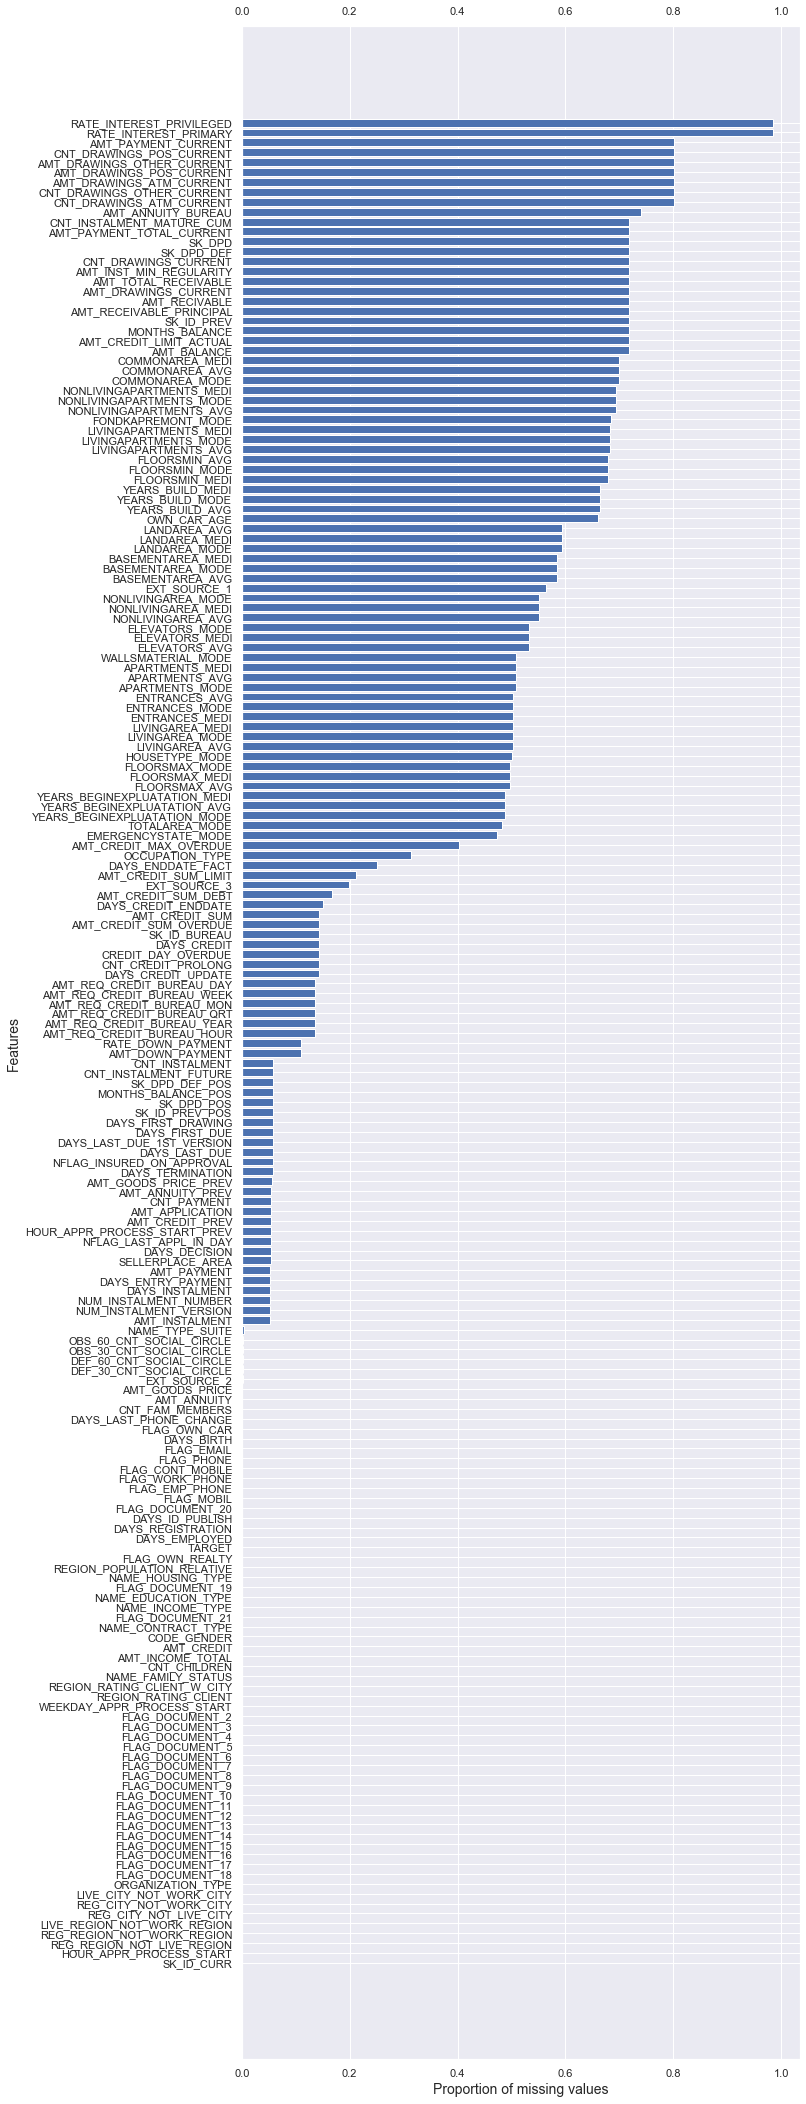

In [6]:
plot_missing_values(data)

In [7]:
def curate(df, threshold=0.6):
    #Stores column information and replaces non np.nan missing values (XNA & XAP) with np.nan
    cols = list(df.columns.values)
    original_length = len(cols)
    df.replace(["XNA", "XAP"], np.nan, inplace=True)
    #Iterating through columns
    drops=0
    for i in range(0,len(cols)):
        #If column is above threshold, it gets dropped
        if ((df[cols[i]].isna().sum()/len(df[cols[i]])) > threshold):
            df.drop(cols[i], inplace=True, axis=1)
            drops+=1
        #Replaces np.nan with most frequent categorical value 
        elif df[cols[i]].dtypes == "object": 
            df[cols[i]].replace(np.nan, df[cols[i]].value_counts(dropna=True).index[0], inplace=True)
        #Replaces np.nan with column mean
        else:
            df[cols[i]].replace(np.nan, df[cols[i]].mean(), inplace=True)
    #Print information in case columns are dropped
    if drops>0:
        instances_dropped = round(100*((original_length-len(df.columns.values))/original_length))
        print(f"Curation successful, {instances_dropped}% of columns dropped.")
    #Print information in case *no* columns are dropped
    else:
        print("Curation successful, no columns were dropped.")
    return df

In [8]:
data = curate(data)

Curation successful, 22% of columns dropped.


### Exploratory Analysis

Machine Learning generates predictions.
Data Science generates insights. 

This section is destined to searching for insights in data that may allow us to adjust our model, *a priori* and *a posteriori* of results.

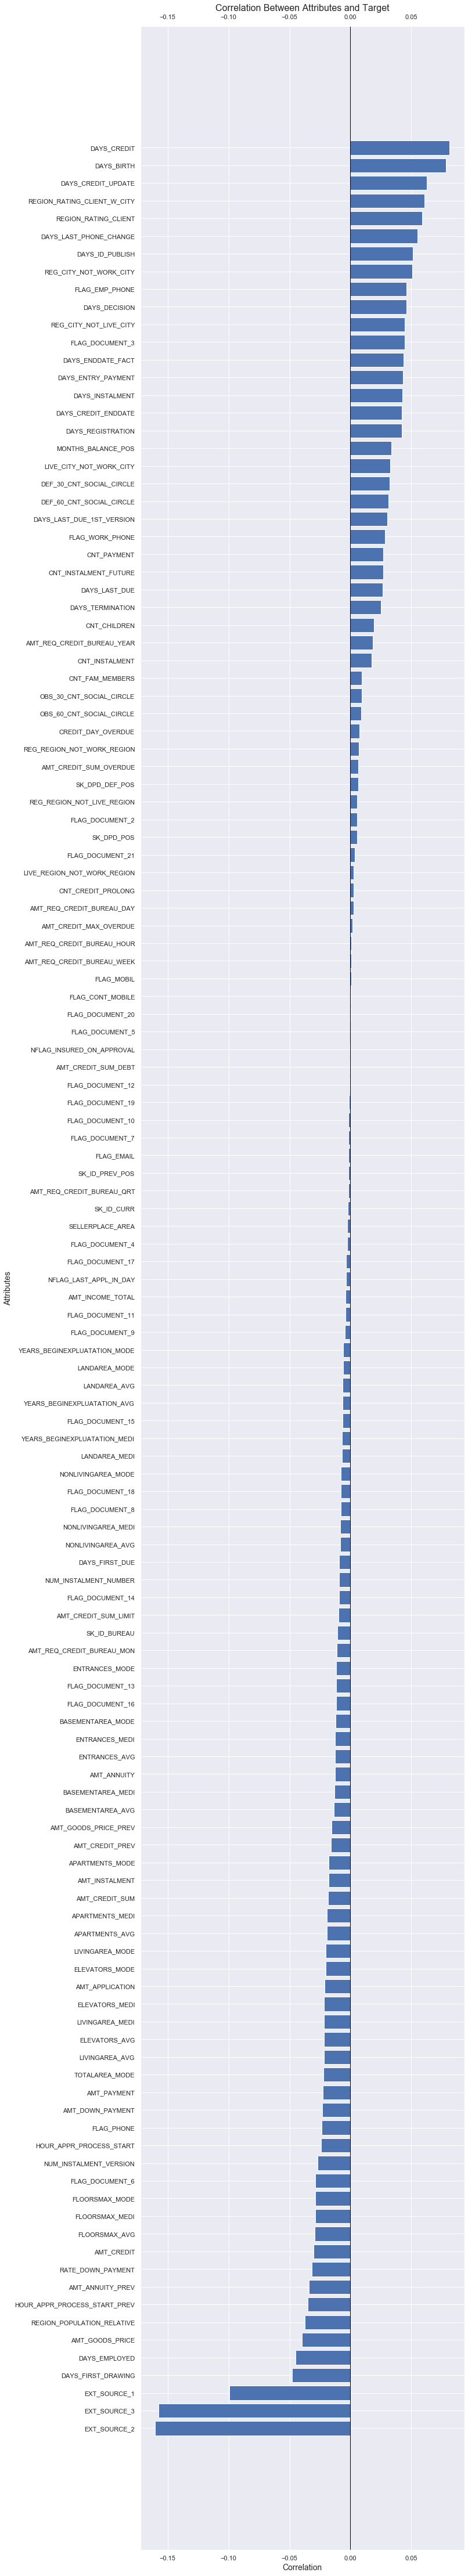

In [9]:
#Correlations of the different variables with the target
x = data.corr()["TARGET"].sort_values(ascending=False)[1:]
y = x.index 
fig, ax = plt.subplots(figsize=(10,80))
ax.set_title('Correlation Between Attributes and Target', fontsize=16)
ax.barh(np.arange(len(y)), x, align='center')
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()
ax.set_xlabel('Correlation', fontsize=14)
ax.set_ylabel('Attributes', fontsize=14)
ax.axvline(linewidth=1, color='black')
ax.tick_params(labelbottom='on',labeltop='on')
plt.show()

**Regarding Feature correlation with Target**: 

In the above case, we might consider cutting the features that are highly correlated with the target variable. We might decide to do this based on a threshold, or just trim the bottom and top 10 features with higher correlation. 

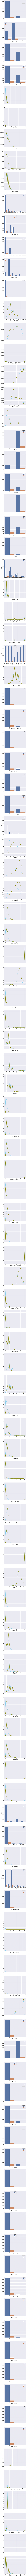

In [10]:
#Separating attributes in application_train into default and non-default
default = application_train[application_train["TARGET"]==1]
default.drop("TARGET", axis=1, inplace=True)
repaid = application_train[application_train["TARGET"]==0]
repaid.drop("TARGET", axis=1, inplace=True)
col = application_train.drop("TARGET", axis=1).columns.values

#Plotting the behavior of different attributes for target = [0, 1]
f, axes = plt.subplots((len(col)-1), 1, figsize=(7,7*len(col)))
for i in range(1, len(col)):
    col_name = col[i]
    if (default[col_name].dtypes != "object") & (len(default[col_name].value_counts())>2):
        sns.distplot(default[col_name], hist=False, color="skyblue", ax=axes[i-1])
        sns.distplot(repaid[col_name], hist=False, color="olive", ax=axes[i-1])
    else:
        sns.countplot(data=application_train, ax=axes[i-1], hue="TARGET", x=col_name)

**Regarding Feature Behaviour in relation to Target:**
Although this process is too extensive to do by hand, we can clearly see how some variables behave in relation with the target. Certain variables have no explainable functional relationship with the target (like the day the loan application process starts), and others might have a process behind them (like region or employment). 
The choice of our features must have a basis in causation (and not just correlation). Moving forward, and as we test different models and feature configurations, we will look for causal relationships and try to identify spurious correlations. 
The above is only an example performed on application_train, the actual feature selection will follow later.

***
### Feature Engineering
***

In [11]:
def one_hot_encode(df):
    cols = list(df.columns.values)
    encoded_cols = []
    #Column iterator
    for i in range(0, len(cols)):
        #"If categorical variable(...)"
        if (df[cols[i]].dtypes=="object"):
            #(...) transform into dummy/indicator variable
            dummies = pd.get_dummies(df[cols[i]], drop_first=True)
            df = pd.merge(df, dummies.add_suffix(("_"+cols[i])), how='left',left_index=True, right_index=True)
            df.drop(cols[i], axis=1, inplace=True)
            encoded_cols.append(cols[i])
    print("OH-Encoded columns:\n",encoded_cols,"\n")
    return df

In [12]:
data = one_hot_encode(data)
data

OH-Encoded columns:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_PREV_POS,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_POS,SK_DPD_DEF_POS,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,HOUR_APPR_PROCESS_START_PREV,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Revolving loans_NAME_CONTRACT_TYPE,M_CODE_GENDER,Y_FLAG_OWN_CAR,Y_FLAG_OWN_REALTY,Family_NAME_TYPE_SUITE,Group of people_NAME_TYPE_SUITE,Other_A_NAME_TYPE_SUITE,Other_B_NAME_TYPE_SUITE,"Spouse, partner_NAME_TYPE_SUITE",Unaccompanied_NAME_TYPE_SUITE,Commercial associate_NAME_INCOME_TYPE,Maternity leave_NAME_INCOME_TYPE,Pensioner_NAME_INCOME_TYPE,State servant_NAME_INCOME_TYPE,Student_NAME_INCOME_TYPE,Unemployed_NAME_INCOME_TYPE,Working_NAME_INCOME_TYPE,Higher education_NAME_EDUCATION_TYPE,Incomplete higher_NAME_EDUCATION_TYPE,Lower secondary_NAME_EDUCATION_TYPE,Secondary / secondary special_NAME_EDUCATION_TYPE,Married_NAME_FAMILY_STATUS,Separated_NAME_FAMILY_STATUS,Single / not married_NAME_FAMILY_STATUS,Unknown_NAME_FAMILY_STATUS,Widow_NAME_FAMILY_STATUS,House / apartment_NAME_HOUSING_TYPE,Municipal apartment_NAME_HOUSING_TYPE,Office apartment_NAME_HOUSING_TYPE,Rented apartment_NAME_HOUSING_TYPE,With parents_NAME_HOUSING_TYPE,Cleaning staff_OCCUPATION_TYPE,Cooking staff_OCCUPATION_TYPE,Core staff_OCCUPATION_TYPE,Drivers_OCCUPATION_TYPE,HR staff_OCCUPATION_TYPE,High skill tech staff_OCCUPATION_TYPE,IT staff_OCCUPATION_TYPE,Laborers_OCCUPATION_TYPE,Low-skill Laborers_OCCUPATION_TYPE,Managers_OCCUPATION_TYPE,Medicine staff_OCCUPATION_TYPE,Private service staff_OCCUPATION_TYPE,Realty agents_OCCUPATION_TYPE,Sales staff_OCCUPATION_TYPE,Secretaries_OCCUPATION_TYPE,Security staff_OCCUPATION_TYPE,Waiters/barmen staff_OCCUPATION_TYPE,MONDAY_WEEKDAY_APPR_PROCESS_START,SATURDAY_WEEKDAY_APPR_PROCESS_START,SUNDAY_WEEKDAY_APPR_PROCESS_START,THURSDAY_WEEKDAY_APPR_PROCESS_START,TUESDAY_WEEKDAY_APPR_PROCESS_START,WEDNESDA

In [13]:
cols = data.columns.values
ixs = data.index
scale_cols=[]
passthrough_cols=[]
for c in data.columns.values:
    if (c!="SK_ID_CURR") & (len(data[c].value_counts()) > 2):
        scale_cols.append(c)
    else:
        passthrough_cols.append(c)
pipeline = ColumnTransformer([("Scaler", MinMaxScaler(), scale_cols)], remainder="passthrough")
data = pd.DataFrame(pipeline.fit_transform(data), columns=[scale_cols+passthrough_cols], index=ixs)
data = data[cols]
data.columns = [x[0] for x in data.columns.values]

In [14]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 250 entries, SK_ID_CURR to Yes_EMERGENCYSTATE_MODE
dtypes: float64(250)
memory usage: 598.9 MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_PREV_POS,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_POS,SK_DPD_DEF_POS,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,HOUR_APPR_PROCESS_START_PREV,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Revolving loans_NAME_CONTRACT_TYPE,M_CODE_GENDER,Y_FLAG_OWN_CAR,Y_FLAG_OWN_REALTY,Family_NAME_TYPE_SUITE,Group of people_NAME_TYPE_SUITE,Other_A_NAME_TYPE_SUITE,Other_B_NAME_TYPE_SUITE,"Spouse, partner_NAME_TYPE_SUITE",Unaccompanied_NAME_TYPE_SUITE,Commercial associate_NAME_INCOME_TYPE,Maternity leave_NAME_INCOME_TYPE,Pensioner_NAME_INCOME_TYPE,State servant_NAME_INCOME_TYPE,Student_NAME_INCOME_TYPE,Unemployed_NAME_INCOME_TYPE,Working_NAME_INCOME_TYPE,Higher education_NAME_EDUCATION_TYPE,Incomplete higher_NAME_EDUCATION_TYPE,Lower secondary_NAME_EDUCATION_TYPE,Secondary / secondary special_NAME_EDUCATION_TYPE,Married_NAME_FAMILY_STATUS,Separated_NAME_FAMILY_STATUS,Single / not married_NAME_FAMILY_STATUS,Unknown_NAME_FAMILY_STATUS,Widow_NAME_FAMILY_STATUS,House / apartment_NAME_HOUSING_TYPE,Municipal apartment_NAME_HOUSING_TYPE,Office apartment_NAME_HOUSING_TYPE,Rented apartment_NAME_HOUSING_TYPE,With parents_NAME_HOUSING_TYPE,Cleaning staff_OCCUPATION_TYPE,Cooking staff_OCCUPATION_TYPE,Core staff_OCCUPATION_TYPE,Drivers_OCCUPATION_TYPE,HR staff_OCCUPATION_TYPE,High skill tech staff_OCCUPATION_TYPE,IT staff_OCCUPATION_TYPE,Laborers_OCCUPATION_TYPE,Low-skill Laborers_OCCUPATION_TYPE,Managers_OCCUPATION_TYPE,Medicine staff_OCCUPATION_TYPE,Private service staff_OCCUPATION_TYPE,Realty agents_OCCUPATION_TYPE,Sales staff_OCCUPATION_TYPE,Secretaries_OCCUPATION_TYPE,Security staff_OCCUPATION_TYPE,Waiters/barmen staff_OCCUPATION_TYPE,MONDAY_WEEKDAY_APPR_PROCESS_START,SATURDAY_WEEKDAY_APPR_PROCESS_START,SUNDAY_WEEKDAY_APPR_PROCESS_START,THURSDAY_WEEKDAY_APPR_PROCESS_START,TUESDAY_WEEKDAY_APPR_PROCESS_START,WEDNESDA

In [15]:
#Saving merged dataframe into pkl
data.to_pickle("data.pkl")

In [16]:
data = pd.read_pickle("data.pkl")

In [17]:
#Creating a training and testing set
X, y = data.iloc[:,2:], data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***
So far, we have a very large feature space (250 variables). Below, we will decide which  features to drop. In order to not to drop any relevant features, we will look at four ways to spot potentially relevant ones:
- Random Forest Feature Importances
- Correlations
- Anova P-Values
- Variance

For each of the above measurements, we will create a DataFrame that is sorted with regards to the measure. In order to be considered, a feature needs to be in the top 25% of any of the four frames.
***

In [18]:
threshold = 0.75
# RandomForest CART
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
GINI = pd.DataFrame({'Feature' : X.columns, 'GINI' : model.feature_importances_})
GINI.sort_values(by = ['GINI'], ascending=False, inplace=True)
# Correlation
Corrs = X_train.apply(lambda x: pearsonr(x.values, y_train)[0], axis=0)
df = pd.DataFrame(index=Corrs.index)
df["TARGET"] = Corrs.values
Corrs = df
Corrs["TARGET"] = abs(Corrs["TARGET"])
Corrs = Corrs.reset_index()
Corrs.columns = ["Feature", "Corr"]
Corrs.sort_values(by="Corr", ascending=False)
# F_CLASSIF
Estimate = SelectKBest(f_classif, k="all").fit(X_train, y_train)
ixs = Estimate.get_support(indices=True)
KBEST = pd.DataFrame(Estimate.pvalues_[ixs], index=X.columns.values[ixs]).reset_index()
KBEST.columns = ["Feature", "P_VAL"]
KBEST.sort_values(by="P_VAL", ascending=True)
# Variance Threshold
Estimate = VarianceThreshold(0).fit(X_train, y_train) 
ixs = Estimate.get_support(indices=True)
VARTHRESH = pd.DataFrame(Estimate.variances_[ixs], index=X.columns.values[ixs]).reset_index()
VARTHRESH.columns = ["Feature", "VAR"]
VARTHRESH.sort_values(by="VAR", ascending=False, inplace=True)
# Merging up
feature_importances = GINI.merge(Corrs, how="left", on="Feature")
feature_importances = feature_importances.merge(KBEST, how="left", on="Feature")
feature_importances = feature_importances.merge(VARTHRESH, how="left", on="Feature")
# Filtering
selected_features = feature_importances[(feature_importances.Feature.isin(list(GINI[GINI.GINI >= GINI.GINI.quantile(threshold)].Feature.values))) | 
                                        (feature_importances.Feature.isin(list(Corrs[Corrs.Corr >= Corrs.Corr.quantile(threshold)].Feature.values))) | 
                                        (feature_importances.Feature.isin(list(KBEST[KBEST.P_VAL <= KBEST.P_VAL.quantile(1-threshold)].Feature.values)))|
                                        (feature_importances.Feature.isin(list(VARTHRESH[VARTHRESH.VAR >= VARTHRESH.VAR.quantile(threshold)].Feature.values)))]

116 features out of 250 selected.


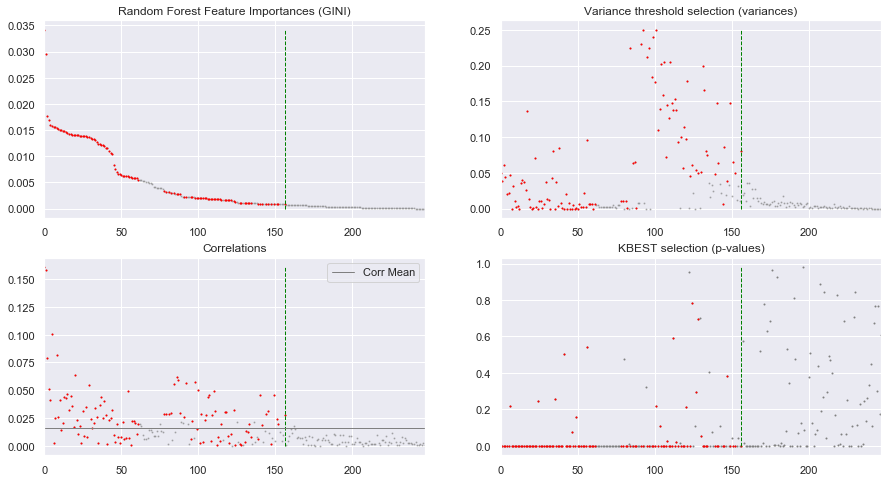

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
max_feature = max(feature_importances.index)
max_select =  max(selected_features.index)
# ax1
ylim=np.max(feature_importances.GINI)
ax1.plot([max_select, max_select], [0, ylim], lw=1, c="green", ls="--")
ax1.scatter(feature_importances.index, feature_importances.GINI, s=1, c="grey", alpha=0.5)
ax1.scatter(selected_features.index, selected_features.GINI, s=1, c="red")
ax1.set_xlim(0, max_feature)
ax1.set_title("Random Forest Feature Importances (GINI)")
# ax2
ylim=np.max(feature_importances.VAR)
ax2.plot([max_select, max_select], [0, ylim], lw=1, c="green", ls="--")
ax2.scatter(feature_importances.index, feature_importances.VAR, s=1, c="grey", alpha=0.5)
ax2.scatter(selected_features.index, selected_features.VAR, s=1, c="red")
ax2.set_xlim(0, max_feature)
ax2.set_title("Variance threshold selection (variances)")
# ax3
ylim=np.max(feature_importances.Corr)
ax3.plot([max_select, max_select], [0, ylim], lw=1, c="green", ls="--")
ax3.scatter(feature_importances.index, feature_importances.Corr, s=1, c="grey", alpha=0.5)
ax3.scatter(selected_features.index, selected_features.Corr, s=1, c="red")
ax3.plot([0, max_feature], [feature_importances.Corr.mean(), feature_importances.Corr.mean()], c="grey", lw=1, label="Corr Mean")
ax3.legend()
ax3.set_xlim(0, max_feature)
ax3.set_title("Correlations")
# ax4
ylim=np.max(feature_importances.P_VAL)
ax4.plot([max_select, max_select], [0, ylim], lw=1, c="green", ls="--")
ax4.scatter(feature_importances.index, feature_importances.P_VAL, s=1, c="grey")
ax4.scatter(selected_features.index, selected_features.P_VAL, s=1, c="red")
ax4.set_xlim(0, max_feature)
ax4.set_title("KBEST selection (p-values)")
print(f"{len(selected_features)} features out of {len(data.columns)} selected.")
plt.show()

The chart above shows the output of our feature selection process. All four charts are sorted in descending order based on the same index. Grey denotes the dropped features and red the selected ones. Green is the cut index of the very last (descending order) feature selected. Since the X axis follows the same order for each chart, we would hope to see that the magnitudes for the different measures are distributed similarly. As we observe in the charts, we have dropped many features that are seemingly irrelevant to the Random Forest algorithm (ax1), the variances with the target variable are significantly higher to the left of the cut (ax2), almost all dropped features are under the mean (grey line) of the correlations (ax3), and the p values also are a lot smaller (indicating significance) to the left of the cut (ax4). 

In [20]:
top_ten = selected_features.head(10).Feature.values
print(f"The most important features by rank are: {dict(zip(range(1,11), top_ten))}")
HomeCredit_columns_description.loc[HomeCredit_columns_description.Row.isin(top_ten)]

The most important features by rank are: {1: 'EXT_SOURCE_2', 2: 'EXT_SOURCE_3', 3: 'DAYS_BIRTH', 4: 'DAYS_ID_PUBLISH', 5: 'DAYS_REGISTRATION', 6: 'EXT_SOURCE_1', 7: 'SK_ID_PREV_POS', 8: 'AMT_PAYMENT', 9: 'DAYS_CREDIT', 10: 'CNT_INSTALMENT_FUTURE'}


,Table,Row,Description,Special
17,application.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
19,application.csv,DAYS_REGISTRATION,How many days before the application did clien...,time only relative to the application
20,application.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
41,application.csv,EXT_SOURCE_1,Normalized score from external data source,normalized
42,application.csv,EXT_SOURCE_2,Normalized score from external data source,normalized
43,application.csv,EXT_SOURCE_3,Normalized score from external data source,normalized
126,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
146,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
218,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


*****
@DANIEL BULLET POINTS
*****

In [21]:
X = X[selected_features["Feature"].values] 
X.to_pickle("X_data.pkl")

In [22]:
data = pd.read_pickle("data.pkl")
X = pd.read_pickle("X_data.pkl")
y = data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***
### Model training
***
Initially, we will run generic models and store their performance in the model_outputs archive.

In [23]:
# Workaround for LGBM (JSON error): Sorting alphabetically
X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [24]:
# Performance of models without hyperparameters
models = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier, GaussianNB, XGBClassifier, LGBMClassifier]
metrics = [roc_auc_score, accuracy_score, precision_score, recall_score, f1_score]
model_outputs = pd.DataFrame(index=[x.__name__ for x in models], columns=[x.__name__ for x in metrics]+["AUC", "Cost"])
ROC_Curve = []
PR_Curve = []
for model in models:
    start = time.time()
    performance = []
    name = model.__name__
    model = model().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    for metric in metrics:
        performance.append(round(metric(y_test, y_pred),3))
    fprs, tprs, _ = roc_curve(y_test, probabilities)
    ROC_Curve.append((fprs, tprs))
    precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
    PR_Curve.append((precisions, recalls))
    performance.append(round(auc(fprs, tprs),3))
    duration = (time.time() - start )/ 60
    performance.append(str(round(duration))+" min")
    model_outputs.loc[name]=performance
    performance = []
    print(f"{name} trained in {round(duration)} Minute(s)")
time.sleep(10)

DecisionTreeClassifier trained in 1 Minute(s)
RandomForestClassifier trained in 4 Minute(s)
AdaBoostClassifier trained in 2 Minute(s)
BaggingClassifier trained in 5 Minute(s)
GradientBoostingClassifier trained in 9 Minute(s)
GaussianNB trained in 0 Minute(s)
XGBClassifier trained in 3 Minute(s)
LGBMClassifier trained in 0 Minute(s)


In [25]:
model_outputs

,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,AUC,Cost
DecisionTreeClassifier,0.545,0.852,0.15,0.178,0.163,0.545,1 min
RandomForestClassifier,0.501,0.92,0.769,0.002,0.004,0.721,4 min
AdaBoostClassifier,0.512,0.919,0.473,0.026,0.05,0.751,2 min
BaggingClassifier,0.512,0.916,0.301,0.029,0.053,0.649,5 min
GradientBoostingClassifier,0.509,0.92,0.56,0.019,0.036,0.762,9 min
GaussianNB,0.63,0.585,0.124,0.684,0.21,0.677,0 min
XGBClassifier,0.524,0.919,0.488,0.053,0.096,0.763,3 min
LGBMClassifier,0.514,0.92,0.56,0.029,0.055,0.77,0 min


Now, we will write a function that is able of adding performance results of base models with sets of hyperparameters to the archive. This will be helpful in quickly adding models and visualize. 

In [26]:
# this function adds model results to our archive of trained models. specify a name, a base model, as well as the hyperparameters
def add_model(name, model, hyperparam_dict):
    start = time.time()
    performance = []
    model = model(**hyperparam_dict).fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    for metric in metrics:
        performance.append(round(metric(y_test, y_pred),3))
    fprs, tprs, _ = roc_curve(y_test, probabilities)
    ROC_Curve.append((fprs, tprs))
    precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
    PR_Curve.append((precisions, recalls))
    performance.append(round(auc(fprs, tprs),3))
    duration = (time.time() - start )/ 60
    performance.append(str(round(duration))+" min")
    model_outputs.loc[name]=performance
    performance = []
    print(f"{name} trained in {round(duration)} Minute(s)")

As we saw above, Gaussian Naive Bayes was computationally cheap and performed well. Before we look at anything else, we quickly optimize that classifier in order to set our AUC benchmark (There is not much room for hp finetuning with NB).

In [27]:
# finding best Gaussian params and adding performance to archive
params = {"var_smoothing":[1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 
                                1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}
best_Gaussian_hp = GridSearchCV(GaussianNB(), params, scoring=make_scorer(f1_score)).fit(X_train, y_train).best_params_
add_model("Opt. GaussianNB", GaussianNB, best_Gaussian_hp)

Opt. GaussianNB trained in 0 Minute(s)


In order to evaluate performance visually, we will also plot ROC and Precision/Recall:

In [28]:
def plot_performance(best_model=False): # If name of best model provided, chart will highlight
    fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(20,10))
    for i in range(len(model_outputs)):
        if best_model != False:
            if model_outputs.index.values[i]== best_model:
                ax1.plot(ROC_Curve[i][0], ROC_Curve[i][1], label=model_outputs.index[i], lw=3)
                ax2.plot(PR_Curve[i][1], PR_Curve[i][0], label=model_outputs.index[i], lw=3)
            else:
                ax1.plot(ROC_Curve[i][0], ROC_Curve[i][1], label=model_outputs.index[i], lw=0.5)
                ax2.plot(PR_Curve[i][1], PR_Curve[i][0], label=model_outputs.index[i], lw=0.5)
        else:
            ax1.plot(ROC_Curve[i][0], ROC_Curve[i][1], label=model_outputs.index[i], lw=0.5)
            ax2.plot(PR_Curve[i][1], PR_Curve[i][0], label=model_outputs.index[i], lw=0.5)
    ax1.plot([0,1], [0,1], ls="--")            
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax1.legend(bbox_to_anchor=(0, 0), loc='lower right')
    ax2.legend(bbox_to_anchor=(1, 0), loc='lower left')
    plt.show()

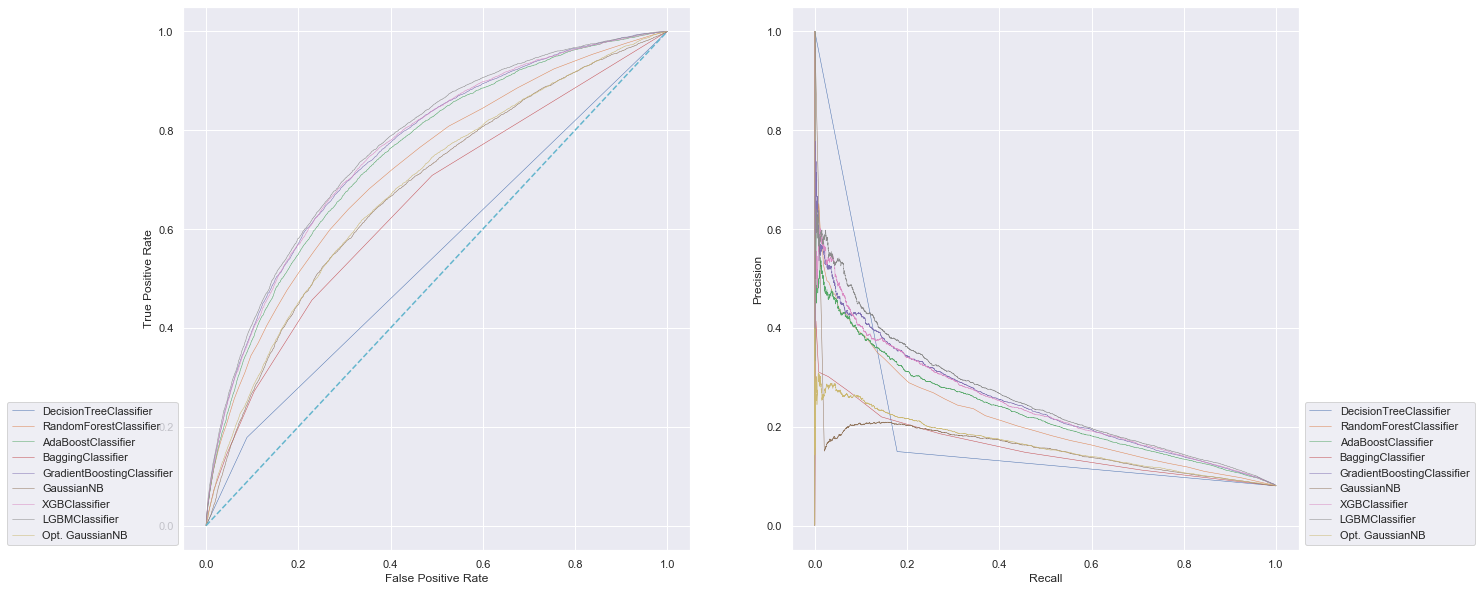

In [29]:
plot_performance()

Looking at the Receiver Operating Characteristics curve, we observe that boosting seems to pay off. Above the orange Random Forest line, there is a small gap and then come AdaBoost, GradientBoosting (hidden unter pink line), XGB, and LGBM. LGBM is both the best curve and computationally light. Therefore, will focus on optimizing it as a base model:

In [30]:
lgbm_hp = {"boosting_type":["gbdt", "dart", "goss", "rf"],
           "num_leaves":[1,10,100,],
           "learning_rate":[1e-1,1e-3,1e-5],
           "n_estimators":[10, 50, 60],
           "class_weight":["balanced", None]}

scoring=make_scorer(f1_score)
model = RandomizedSearchCV(LGBMClassifier(), lgbm_hp, verbose=0, cv=5, n_iter=10, scoring=scoring, n_jobs=-1)
model.fit(X_train, y_train)
opt_params = model.best_params_
print(f"Best parameters: {opt_params}")

Best parameters: {'num_leaves': 100, 'n_estimators': 10, 'learning_rate': 1e-05, 'class_weight': 'balanced', 'boosting_type': 'dart'}


In [31]:
add_model("LGBM 2", LGBMClassifier, opt_params)

LGBM 2 trained in 0 Minute(s)


In [32]:
model_outputs

,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,AUC,Cost
DecisionTreeClassifier,0.545,0.852,0.15,0.178,0.163,0.545,1 min
RandomForestClassifier,0.501,0.92,0.769,0.002,0.004,0.721,4 min
AdaBoostClassifier,0.512,0.919,0.473,0.026,0.05,0.751,2 min
BaggingClassifier,0.512,0.916,0.301,0.029,0.053,0.649,5 min
GradientBoostingClassifier,0.509,0.92,0.56,0.019,0.036,0.762,9 min
GaussianNB,0.63,0.585,0.124,0.684,0.21,0.677,0 min
XGBClassifier,0.524,0.919,0.488,0.053,0.096,0.763,3 min
LGBMClassifier,0.514,0.92,0.56,0.029,0.055,0.77,0 min
Opt. GaussianNB,0.613,0.808,0.177,0.379,0.242,0.682,0 min
LGBM 2,0.66,0.657,0.145,0.665,0.238,0.717,0 min


While AUC is roughly the same, we were able to increase Recall from 3% to 66%! The optimized LGBM has grown F1 by a factor of 5. Lets go for one more round, but increase iterations and focus on Precision. We spot more than half of the defaults so far, but maybe we can achieve this without allowing so many non-defaults into our predictions:

In [33]:
# Parameters
# ---------------------------------------------------------------------------------------------- #
name_of_new_model = "LGBM 3"
scoring=make_scorer(precision_score)
lgbm_hp = {"boosting_type":["gbdt", "dart", "goss", "rf"],
           "num_leaves":[50,100,150,200],
           "learning_rate":[1e-1,1e-2],
           "n_estimators":[50, 100, 200],
           "class_weight":["balanced"],
           "max_depth":[-1]}
# ---------------------------------------------------------------------------------------------- #
model = RandomizedSearchCV(LGBMClassifier(), lgbm_hp, verbose=0, cv=5, n_iter=15,scoring=scoring, n_jobs=-1)
model.fit(X_train, y_train)
opt_params = model.best_params_
print(f"Best parameters: {opt_params}")
add_model(name_of_new_model, LGBMClassifier, opt_params)
time.sleep(5)

Best parameters: {'num_leaves': 200, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1, 'class_weight': 'balanced', 'boosting_type': 'goss'}
LGBM 3 trained in 0 Minute(s)


In [34]:
model_outputs

,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,AUC,Cost
DecisionTreeClassifier,0.545,0.852,0.15,0.178,0.163,0.545,1 min
RandomForestClassifier,0.501,0.92,0.769,0.002,0.004,0.721,4 min
AdaBoostClassifier,0.512,0.919,0.473,0.026,0.05,0.751,2 min
BaggingClassifier,0.512,0.916,0.301,0.029,0.053,0.649,5 min
GradientBoostingClassifier,0.509,0.92,0.56,0.019,0.036,0.762,9 min
GaussianNB,0.63,0.585,0.124,0.684,0.21,0.677,0 min
XGBClassifier,0.524,0.919,0.488,0.053,0.096,0.763,3 min
LGBMClassifier,0.514,0.92,0.56,0.029,0.055,0.77,0 min
Opt. GaussianNB,0.613,0.808,0.177,0.379,0.242,0.682,0 min
LGBM 2,0.66,0.657,0.145,0.665,0.238,0.717,0 min


In [35]:
print(f"{round(data.TARGET.value_counts().values[1] / sum(data.TARGET.value_counts().values),4)*100}% of the instances are defaults.")

8.07% of the instances are defaults.


We are still not fully happy with our precision. Lets go for one more round (with a more radical set of potential hyperparameters) and see how much recall we have to give up.

In [36]:
# Parameters
# ---------------------------------------------------------------------------------------------- #
name_of_new_model = "LGBM 4"
scoring=make_scorer(precision_score)
lgbm_hp = {"boosting_type":["gbdt", "dart", "goss", "rf"],
           "num_leaves":[150,200, 300],
           "learning_rate":[1e-1,1e-2],
           "n_estimators":[200, 300, 400],
           "class_weight":["balanced"],
           "max_depth":[-1]}
# ---------------------------------------------------------------------------------------------- #
model = RandomizedSearchCV(LGBMClassifier(), lgbm_hp, verbose=0, cv=5, n_iter=10,scoring=scoring, n_jobs=-1)
model.fit(X_train, y_train)
opt_params = model.best_params_
print(f"Best parameters: {opt_params}")
add_model(name_of_new_model, LGBMClassifier, opt_params)
time.sleep(5) # give CPU some rest, maybe this is completely unnecessary but seems appropriate
model_outputs

Best parameters: {'num_leaves': 150, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1, 'class_weight': 'balanced', 'boosting_type': 'goss'}
LGBM 4 trained in 0 Minute(s)


,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,AUC,Cost
DecisionTreeClassifier,0.545,0.852,0.15,0.178,0.163,0.545,1 min
RandomForestClassifier,0.501,0.92,0.769,0.002,0.004,0.721,4 min
AdaBoostClassifier,0.512,0.919,0.473,0.026,0.05,0.751,2 min
BaggingClassifier,0.512,0.916,0.301,0.029,0.053,0.649,5 min
GradientBoostingClassifier,0.509,0.92,0.56,0.019,0.036,0.762,9 min
GaussianNB,0.63,0.585,0.124,0.684,0.21,0.677,0 min
XGBClassifier,0.524,0.919,0.488,0.053,0.096,0.763,3 min
LGBMClassifier,0.514,0.92,0.56,0.029,0.055,0.77,0 min
Opt. GaussianNB,0.613,0.808,0.177,0.379,0.242,0.682,0 min
LGBM 2,0.66,0.657,0.145,0.665,0.238,0.717,0 min


***
### Deep Learning Model
***
We will also add a quite generic sequential model. 

In [37]:
# Adding  a Keras Classifier
model = Sequential()
name = "Keras Classifier"
model.add(Dense(64, input_shape = (X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
start = time.time()
model.fit(X_train, y_train, epochs=5)
y_pred = model.predict(X_test)
y_pred = np.around(y_pred.flatten())
probabilities = model.predict_proba(X_test)
for metric in metrics:
        performance.append(round(metric(y_test, y_pred),4))
fprs, tprs, _ = roc_curve(y_test, probabilities)
ROC_Curve.append((fprs, tprs))
precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
PR_Curve.append((precisions, recalls))
performance.append(round(auc(fprs, tprs),3))
duration = (time.time() - start ) / 60
performance.append(str(round(duration))+" min")
model_outputs.loc[name]=performance
performance = []
print(f"\n{name} trained in {round(duration)} Minute(s)")

Epoch 1/5
246008/246008 [==============================] - 13s 54us/step - loss: 0.2698 - accuracy: 0.9184
Epoch 2/5
246008/246008 [==============================] - 14s 55us/step - loss: 0.2569 - accuracy: 0.9189
Epoch 3/5
246008/246008 [==============================] - 14s 57us/step - loss: 0.2549 - accuracy: 0.9188
Epoch 4/5
246008/246008 [==============================] - 13s 53us/step - loss: 0.2543 - accuracy: 0.9187
Epoch 5/5
246008/246008 [==============================] - 13s 53us/step - loss: 0.2541 - accuracy: 0.9187

Keras Classifier trained in 1 Minute(s)


In [38]:
model_outputs

,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,AUC,Cost
DecisionTreeClassifier,0.545,0.852,0.15,0.178,0.163,0.545,1 min
RandomForestClassifier,0.501,0.92,0.769,0.002,0.004,0.721,4 min
AdaBoostClassifier,0.512,0.919,0.473,0.026,0.05,0.751,2 min
BaggingClassifier,0.512,0.916,0.301,0.029,0.053,0.649,5 min
GradientBoostingClassifier,0.509,0.92,0.56,0.019,0.036,0.762,9 min
GaussianNB,0.63,0.585,0.124,0.684,0.21,0.677,0 min
XGBClassifier,0.524,0.919,0.488,0.053,0.096,0.763,3 min
LGBMClassifier,0.514,0.92,0.56,0.029,0.055,0.77,0 min
Opt. GaussianNB,0.613,0.808,0.177,0.379,0.242,0.682,0 min
LGBM 2,0.66,0.657,0.145,0.665,0.238,0.717,0 min


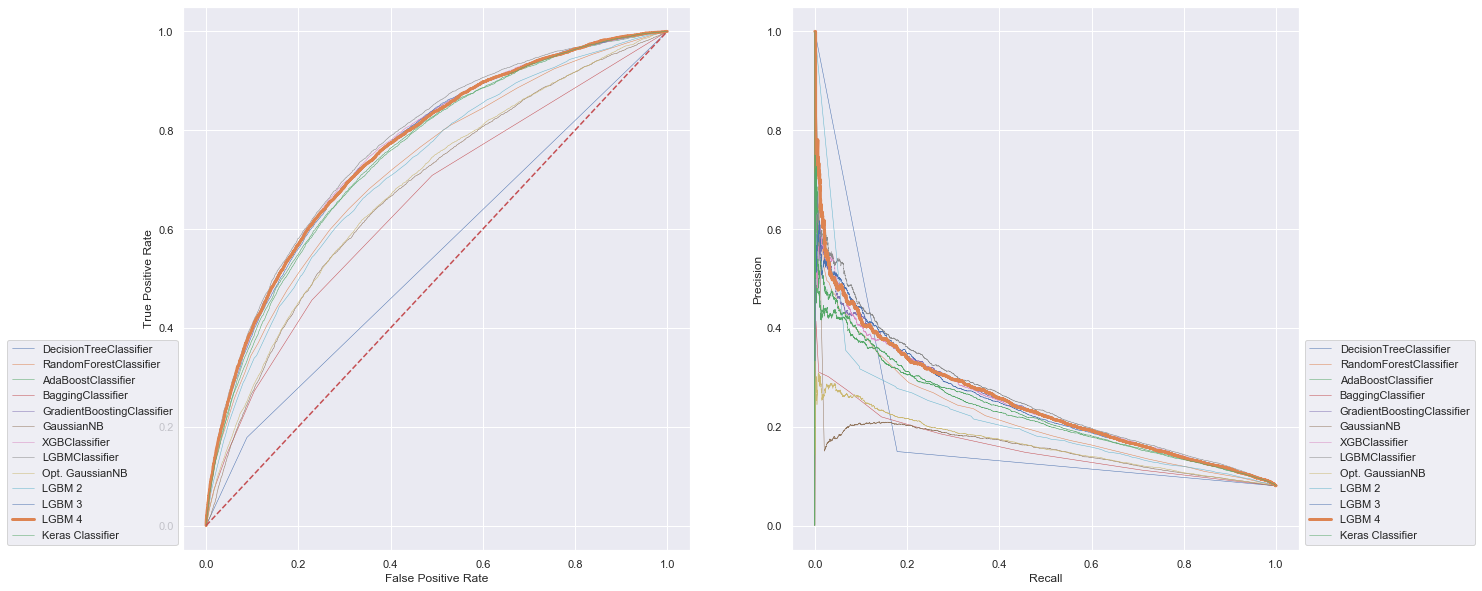

In [41]:
plot_performance(best_model="LGBM 4")

In [40]:
duration = ((time.time() - whole_notebook ) / 60)
print(f"Notebook was successfully run in {round(duration)} Minute(s)")

Notebook was successfully run in 116 Minute(s)


***
### Recommendations
***

